In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/Pallak Sinha/Desktop/Files for data analysis/train.csv')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [5]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [6]:
print(df.value_counts())

PassengerId  Survived  Pclass  Name                                                  Sex     Age   SibSp  Parch  Ticket    Fare      Cabin  Embarked
2            1         1       Cumings, Mrs. John Bradley (Florence Briggs Thayer)   female  38.0  1      0      PC 17599  71.2833   C85    C           1
572          1         1       Appleton, Mrs. Edward Dale (Charlotte Lamson)         female  53.0  2      0      11769     51.4792   C101   S           1
578          1         1       Silvey, Mrs. William Baird (Alice Munger)             female  39.0  1      0      13507     55.9000   E44    S           1
582          1         1       Thayer, Mrs. John Borland (Marian Longstreth Morris)  female  39.0  1      1      17421     110.8833  C68    C           1
584          0         1       Ross, Mr. John Hugo                                   male    36.0  0      0      13049     40.1250   A10    C           1
                                                                                 

In [23]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [24]:
if 'Cabin' in df.columns:
    df = df.drop(columns=['Cabin'])
    
df = df.drop_duplicates()

df['Age'] = df['Age'].fillna('Unknown')

df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


In [25]:
print("\nMissing values after cleaning:")
print(df.isnull().sum())

print(f"\nShape after cleaning: {df.shape}")


Missing values after cleaning:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Shape after cleaning: (891, 11)


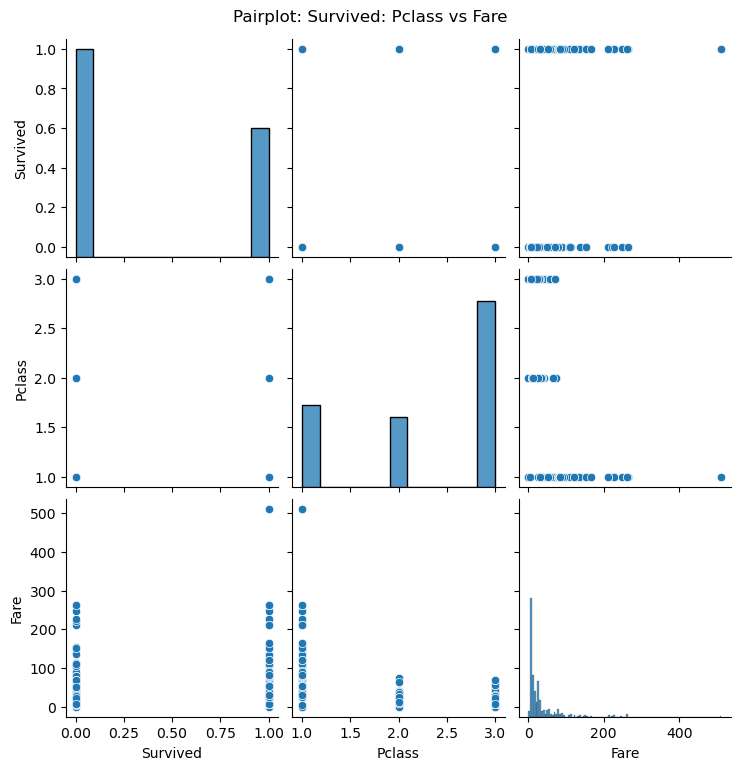

In [40]:
sns.pairplot(df[['Survived', 'Pclass', 'Fare']].dropna())
plt.suptitle("Pairplot: Survived: Pclass vs Fare", y=1.02)
plt.show()

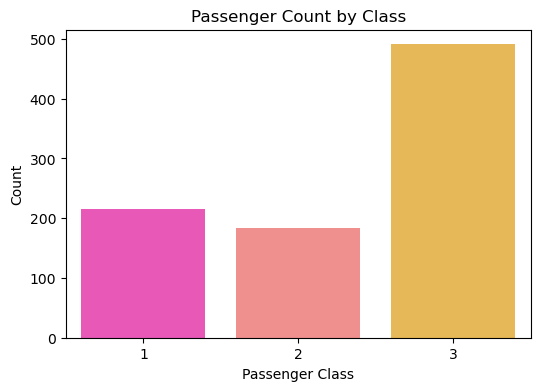

In [45]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', data=df, palette='spring')
plt.title('Passenger Count by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

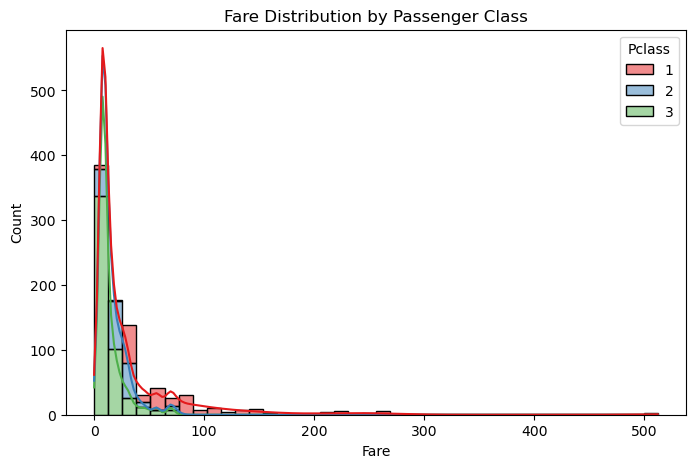

In [50]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Fare', hue='Pclass', bins=40, kde=True, multiple='stack', palette='Set1')
plt.title('Fare Distribution by Passenger Class')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

We can see that most of the passengers were from 3rd class
Also from the pair plot we can see that there is a 1st class outlier who survived.

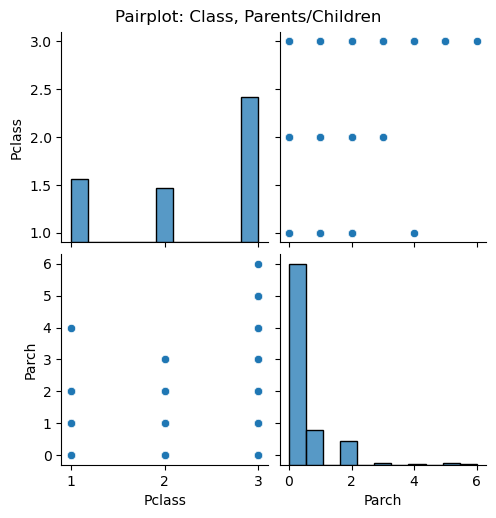

In [27]:
sns.pairplot(df[['Pclass', 'Parch']])
plt.suptitle("Pairplot: Class, Parents/Children", y=1.02)
plt.show()

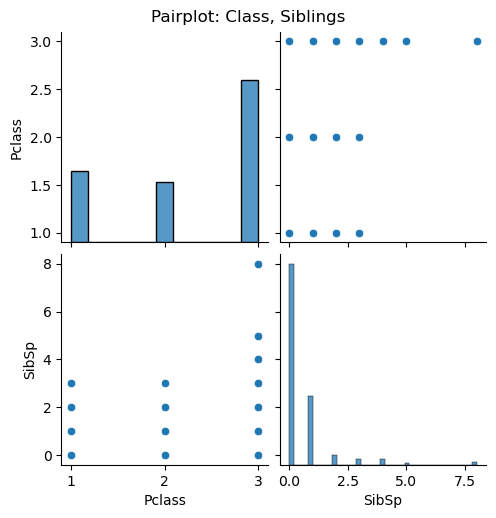

In [28]:
sns.pairplot(df[['Pclass', 'SibSp']])
plt.suptitle("Pairplot: Class, Siblings", y=1.02)
plt.show()


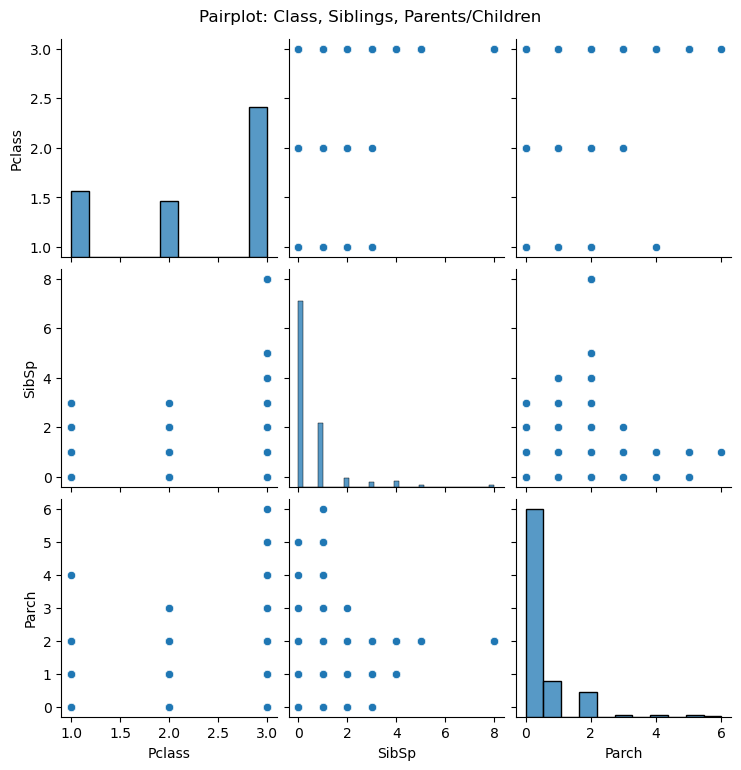

In [29]:
sns.pairplot(df[['Pclass', 'SibSp', 'Parch']])
plt.suptitle("Pairplot: Class, Siblings, Parents/Children", y=1.02)
plt.show()

Here we can see that the outlier of the 3rd class who survived was travelling with siblings/spouses

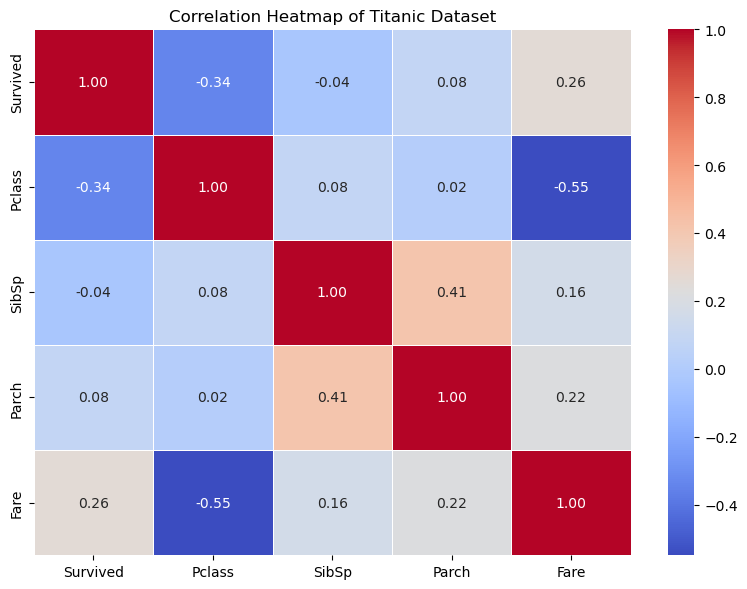

In [31]:
numeric_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[numeric_cols].corr(numeric_only=True)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,         
            cmap='coolwarm',    
            fmt='.2f',          
            linewidths=0.5)     
plt.title('Correlation Heatmap of Titanic Dataset')
plt.tight_layout()
plt.show()

There is mostly negative correlation between these values means that two variables move in opposite directions; i.e., when one increases the other decreases, and vice-versa.
Strong negative correlation between Pclass and Fare means higher classes paid more; lower classes paid much less. Also Moderate Negative correlation between Pclass and survived means that as class increases(3rd class) chance of survival decreases.
We can see moderate correlation between Parch and SibSp means that passengers with siblings/spouses aboard also had parents/children aboard.


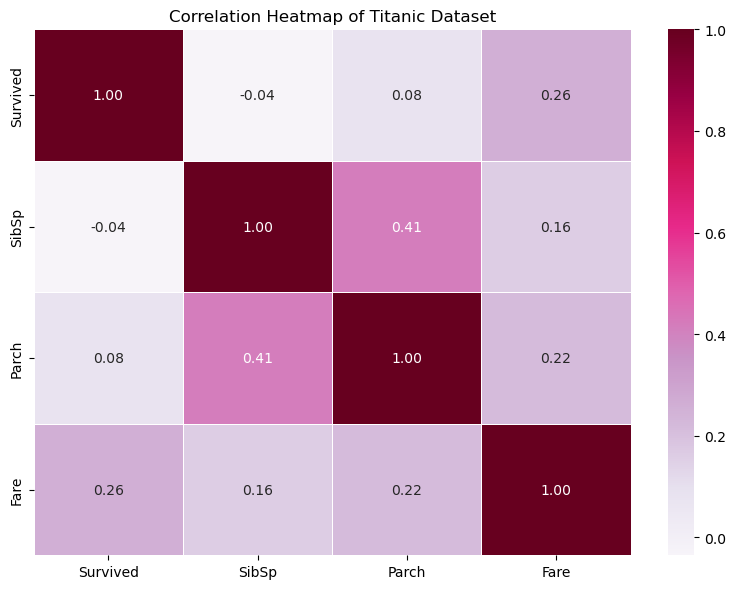

In [33]:
numeric_cols = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[numeric_cols].corr(numeric_only=True)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True,         
            cmap='PuRd',    
            fmt='.2f',          
            linewidths=0.5)     
plt.title('Correlation Heatmap of Titanic Dataset')
plt.tight_layout()
plt.show()

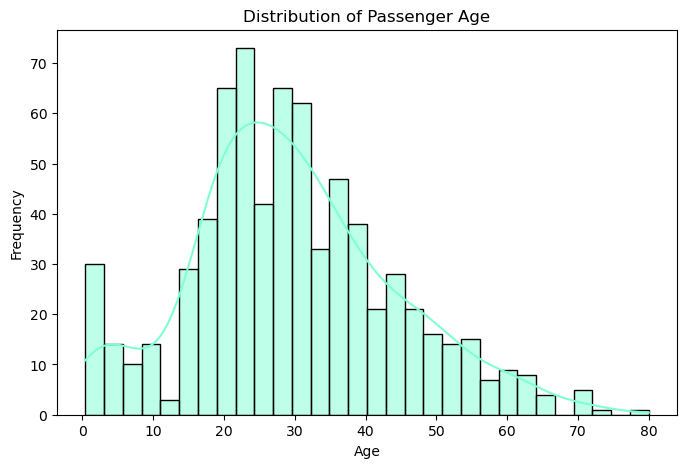

In [37]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

plt.figure(figsize=(8, 5))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='aquamarine')
plt.title('Distribution of Passenger Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Distribution of Age shows that it is very much varied from 0 to 80. But most of the passengers were from 20-40 years of age.
There were more children than elderly on board Titanic.

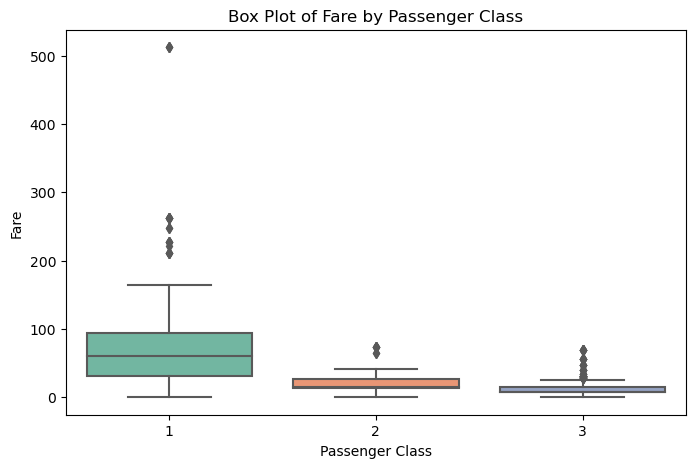

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='Set2')
plt.title('Box Plot of Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

1. Fare decreases as class increases
2. Presence of Outliers (especially in 1st class)
    There were some very expensive 1st class tickets, possibly for luxury suites or wealthy passengers (above 200 and even 500)
3. Distribution is skewed
    All three box plots show right skewness — long upper tails, indicating a few very high fares.
    Most passengers in each class paid fares near the lower end.
The Titanic fare structure clearly reflected social class.

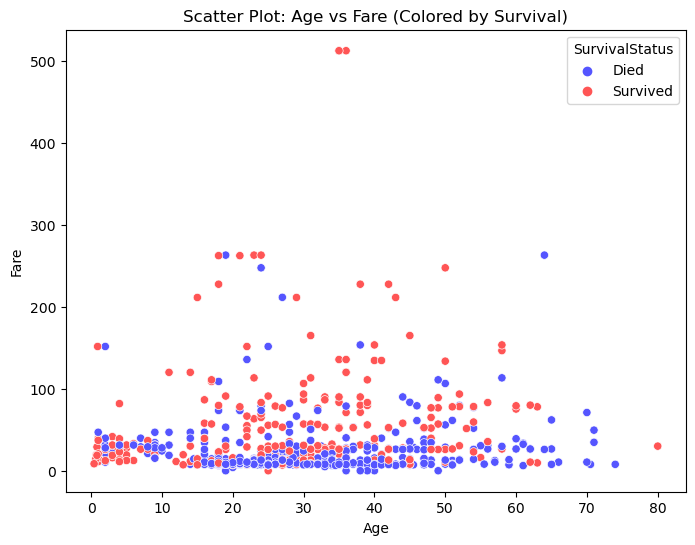

In [39]:
df_filtered = df[['Age', 'Fare', 'Survived']].dropna()

df_filtered['SurvivalStatus'] = df_filtered['Survived'].map({0: 'Died', 1: 'Survived'})

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x='Age', y='Fare', hue='SurvivalStatus', palette='seismic')
plt.title('Scatter Plot: Age vs Fare (Colored by Survival)')
plt.show()

Here the the majority of people who died had paid less fare irrespective of age. But most children survived, while mostly 2nd class passengers who were young also survived.